In [28]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import operator
import PIL
from PIL import Image

In [51]:
img = cv2.imread('sudoku_2.jpeg',0)
print(np.shape(img))

puzzle = img
out_box = np.zeros((np.size(puzzle)), np.uint8)
dst = cv2.GaussianBlur(puzzle, (9, 9), 0)
kernel = np.array([[0,1,0],[1,1,1],[0,1,0]],np.uint8)
kernel2 = np.ones((3,3),np.int8)
out_box = cv2.adaptiveThreshold(dst, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11,2)
out_box = cv2.bitwise_not(out_box)
real = out_box.copy()



(512, 481)


In [52]:


cv2.imshow('image', real) 
cv2.waitKey(0)   
cv2.destroyAllWindows()
#print(out_box)


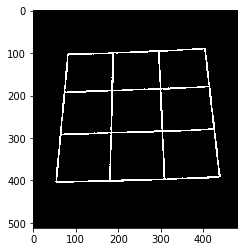

In [53]:
maxi = -1
maxpt = None
count = 10
height, width = np.shape(out_box)
m = 0
for y in range(height):
    row = out_box[y]
    #plt.imshow(out_box,cmap='gray', vmin=0, vmax=255)
    #print(row)
    for x in range(width):
        #print(row)
        if row[x] >= 128:
            
            area = cv2.floodFill(out_box, None, (x, y), 64)[0]

            #plt.imshow(out_box,cmap='gray', vmin=0, vmax=255)
            #plt.show()
 
            if area > maxi:
                maxpt = (x,y)
                maxi = area
                
'''
cv2.imshow('iMAGE',out_box) 
cv2.waitKey(0)   
cv2.destroyAllWindows()
print(area)
print(maxpt)
'''


final = cv2.floodFill(out_box, None, maxpt, 256)


#plt.imshow(out_box,cmap='gray', vmin=0, vmax=255)
#plt.show()

for y in range(height):
    row = out_box[y]
    #plt.imshow(out_box,cmap='gray', vmin=0, vmax=255)
    #print(row)
    for x in range(width):
        #print(row)
        if row[x] ==64:
            
            cv2.floodFill(out_box, None, (x, y), 0)[0]



plt.imshow(out_box,cmap='gray', vmin=0, vmax=255)
plt.show()




In [54]:
import cv2
import os

image_folder = 'flood'
video_name = 'video.avi'

images = [img for img in os.listdir(image_folder) if img.endswith(".jpeg")]
frame = cv2.imread(os.path.join(image_folder, images[0]))
height, width, layers = frame.shape

length = len(images)
video = cv2.VideoWriter(video_name, 0, int(length/7), (width,height))



for i in range(1,length  + 1):
    image = str(i) + ".jpeg"
    #print(image)
    video.write(cv2.imread(os.path.join(image_folder, image)))

cv2.destroyAllWindows()
video.release()
print('done')


KeyboardInterrupt: 

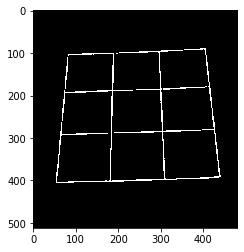

In [55]:
kernel = np.ones((2,2), np.uint8)
img_dil = cv2.erode(out_box, kernel, iterations = 1)
#img_dil = out_box
plt.imshow(img_dil,cmap='gray', vmin=0, vmax=255)


In [68]:
copy = img_dil.copy()
contours, h = cv2.findContours(copy, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE) 
print(len(contours))

#cv2.drawContours(copy, contours, 0, (8, 230, 255), 6)

#plt.imshow(copy,cmap='gray', vmin=0, vmax=255)
cv2.imshow('Contours', copy)
cv2.waitKey(0)
cv2.destroyAllWindows() 
#print(h)


1


In [57]:
contours = sorted(contours, key=cv2.contourArea, reverse=True)
large = contours[0]

result_img = cv2.cvtColor(real, cv2.COLOR_GRAY2RGB)

cv2.drawContours(result_img, contours, 0, (0, 230, 255), 6)

cv2.imshow('Contours', result_img)
cv2.waitKey(0)
cv2.destroyAllWindows() 

#print(contours[0])
#cv2.drawContours(copy, contours, 0, (0, 230, 255), 6)
#plt.imshow(copy,cmap='gray', vmin=0, vmax=255)

In [58]:
result_img = cv2.cvtColor(real, cv2.COLOR_GRAY2RGB)

cv2.drawContours(result_img, large, 0, (255,0,0), 2)

cv2.imshow('Contours', result_img)
cv2.waitKey(0)
cv2.destroyAllWindows() 

In [59]:
def dist(a,b):
    return (np.sqrt((a[0]-b[0])**2 +(a[1]-b[1])**2)) 
#a = np.ones(2)
#b = np.zeros(2)
#print(dist(a,b))

In [69]:
polygon = contours[0]

bottom_right, _ = max(enumerate([pt[0][0] + pt[0][1] for pt in polygon]), key=operator.itemgetter(1))
top_left, _ = min(enumerate([pt[0][0] + pt[0][1] for pt in polygon]), key=operator.itemgetter(1))
bottom_left, _ = min(enumerate([pt[0][0] - pt[0][1] for pt in polygon]), key=operator.itemgetter(1))
top_right, _ = max(enumerate([pt[0][0] - pt[0][1] for pt in polygon]), key=operator.itemgetter(1))

rect = np.zeros((4, 2), dtype = "float32")
rect[0] = polygon[top_left][0]
rect[1] = polygon[top_right][0]
rect[2] = polygon[bottom_right][0]
rect[3] = polygon[bottom_left][0]


print(rect)

# now that we have our rectangle of points, let's compute the width and height

(tl,tr,br,bl) = rect
w_a = dist(tl,tr)
w_b = dist(bl,br)

maxWidth = int(max(w_a,w_b))

h_a = dist(tl,bl)
h_b = dist(tr,br)
maxHeight = int(max(h_a,h_b))
print()

dst = np.array([[0, 0],[maxWidth - 1, 0],[maxWidth - 1, maxHeight - 1],[0, maxHeight - 1]], dtype = "float32")

M = cv2.getPerspectiveTransform(rect, dst)
warp = cv2.warpPerspective(real, M, (maxWidth, maxHeight))

cv2.imshow('image', warp) 
cv2.waitKey(0)   
cv2.destroyAllWindows()


[[ 83. 103.]
 [405.  91.]
 [439. 392.]
 [ 53. 404.]]



In [70]:
copy2 = warp.copy()

cv2.imshow('image', copy2) 
cv2.waitKey(0)   
cv2.destroyAllWindows()


print(np.shape(copy2))


dim = (40*9,40*9)

resized = cv2.resize(copy2, dim) 


print(np.shape(resized))
cv2.imshow('image', resized) 
cv2.waitKey(0)   
cv2.destroyAllWindows()





h,w = np.shape(resized[0:])

print(h)


(302, 386)
(360, 360)
360


TypeError: unsupported operand type(s) for /: 'tuple' and 'int'

In [40]:
def obtain_dig(img):
    digits = []
    h,w = np.shape(img[:])
    dig_h = int(h/9)
    dig_w =int(w/9) 
    
    for j in range(0,9):
        for i in range (0,9):
            tl = (i*dig_h , j*dig_w)
            br = (i*dig_h + dig_h, j*dig_w + dig_w)
            points = (tl,br)
            digits.append(points)
    return digits,dig_h
            
digits,side = obtain_dig(resized)
(tl,br) = (digits[0])
print(digits[0])

((0, 0), (40, 40))


In [41]:
    def obtain_dig(img):
        '''
        return a list containing the coords of the ends of the squares
        of the digit
        '''
        digits = []
        h, w = np.shape(img[:])
        dig_h = int(h / 9)
        dig_w = int(w / 9)

        for j in range(0, 9):
            for i in range(0, 9):
                tl = (i * dig_h, j * dig_w)
                br = (i * dig_h + dig_h, j * dig_w + dig_w)
                points = (tl, br)
                digits.append(points)
        return digits,dig_h

    def processing(dig_img):
        maxi = 0
        seed = (None, None)
        side, side = np.shape(dig_img[:])
        margin = int(side / 6)
        corner = [margin, side - margin, margin, side - margin]
        for y in range(corner[0], corner[1]):
            row = dig_img[y]
            for x in range(corner[2], corner[3]):
                if row[x] >= 128:
                    area = cv2.floodFill(dig_img, None, (x, y), 64)[0]
                    if (area > maxi):
                        seed = (x, y)
                        maxi = area

        for y in range(0, side):
            row = dig_img[y]
            for x in range(0, side):
                if (row[x] >= 128):
                    cv2.floodFill(dig_img, None, (x, y), 64)

        if maxi > 0:
            cv2.floodFill(dig_img, None, seed, 255)

        top, bottom, left, right = side, 0, side, 0

        for y in range(0, side):
            row = dig_img[y]
            for x in range(0, side):

                if (row[x] > 0 and row[x] < 250):
                    cv2.floodFill(dig_img, None, (x, y), 0)

                # Find the bounding parameters
                if row[x] == 255:
                    top = y if y < top else top
                    bottom = y if y > bottom else bottom
                    left = x if x < left else left
                    right = x if x > right else right

        ends = [[top, left], [bottom, right]]

        return dig_img,ends

    def cut_img(img, ends):
        copy = img[ends[0][0]: ends[1][0], ends[0][1]: ends[1][1]]
        return copy

    def scale_and_centre(img, size, margin=0, background=0):
        """Scales and centres an image onto a new background square."""
        h, w = img.shape[:2]

        def centre_pad(length):
            """Handles centering for a given length that may be odd or even."""
            if length % 2 == 0:
                side1 = int((size - length) / 2)
                side2 = side1
            else:
                side1 = int((size - length) / 2)
                side2 = side1 + 1
            return side1, side2

        def scale(r, x):
            return int(r * x)

        if h > w:
            t_pad = int(margin / 2)
            b_pad = t_pad
            ratio = (size - margin) / h
            w, h = scale(ratio, w), scale(ratio, h)
            l_pad, r_pad = centre_pad(w)
        else:
            l_pad = int(margin / 2)
            r_pad = l_pad
            ratio = (size - margin) / w
            w, h = scale(ratio, w), scale(ratio, h)
            t_pad, b_pad = centre_pad(h)

        img = cv2.resize(img, (w, h))
        img = cv2.copyMakeBorder(img, t_pad, b_pad, l_pad, r_pad, cv2.BORDER_CONSTANT, None, background)
        return cv2.resize(img, (size, size))


In [42]:
def processing(dig_img):
    maxi = 0
    seed = (None,None)
    side,side = np.shape(dig_img[:])
    margin = int(side/6)
    corner = [margin,side-margin,margin,side-margin]
    print(corner)
    for y in range(corner[0],corner[1]):
        row = dig_img[y]
        for x in range (corner[2],corner[3]):
            
            if row[x] >= 128:
                area = cv2.floodFill(dig_img, None, (x, y), 64)[0]
                if(area > maxi):
                    seed = (x,y)
                    maxi = area
                    
    
    
    for y in range(0,side):
        row = dig_img[y]
        for x in range(0,side):
            if(row[x] >= 128):
                cv2.floodFill(dig_img,None, (x, y), 64)

    if maxi > 0:
        cv2.floodFill(dig_img, None, seed, 255)
    
    maxim = 0
    minim = 2*side
    
    top, bottom, left, right = side, 0, side, 0

    for y in range(0,side):
        row = dig_img[y]
        for x in range(0,side):
            
            if(row[x] > 0 and row[x] < 250):
                cv2.floodFill(dig_img,None, (x, y), 0)
                '''
            elif(row[x]==255):
                 if ((x+y) < minim and (x+y) > 0 ) :
                        (t,l) = (y,x)
                        minim = (x+y)
                
                 if ((x+y) > maxim and  (x+y) < 2*side) :
                        (b,r) = (y,x)
                        maxim = (x+y)
    ends = [t,l,b,r]
    '''
    
            # Find the bounding parameters
            if row[x] == 255:
                top = y if y < top else top
                bottom = y if y > bottom else bottom
                left = x if x < left else left
                right = x if x > right else right
    
    
    ends = [[top,left],[bottom,right]]
       
    return dig_img,ends


In [44]:
def cut_img(img,ends):
    #copy  =  img.copy()
    copy  = img[ends[0][0] : ends[1][0],ends[0][1] : ends[1][1]]
    return copy

    

In [45]:
def scale_and_centre(img, size, margin=0, background=0):
	"""Scales and centres an image onto a new background square."""
	h, w = img.shape[:2]

	def centre_pad(length):
		"""Handles centering for a given length that may be odd or even."""
		if length % 2 == 0:
			side1 = int((size - length) / 2)
			side2 = side1
		else:
			side1 = int((size - length) / 2)
			side2 = side1 + 1
		return side1, side2

	def scale(r, x):
		return int(r * x)

	if h > w:
		t_pad = int(margin / 2)
		b_pad = t_pad
		ratio = (size - margin) / h
		w, h = scale(ratio, w), scale(ratio, h)
		l_pad, r_pad = centre_pad(w)
	else:
		l_pad = int(margin / 2)
		r_pad = l_pad
		ratio = (size - margin) / w
		w, h = scale(ratio, w), scale(ratio, h)
		t_pad, b_pad = centre_pad(h)

	img = cv2.resize(img, (w, h))
	img = cv2.copyMakeBorder(img, t_pad, b_pad, l_pad, r_pad, cv2.BORDER_CONSTANT, None, background)
	return cv2.resize(img, (size, size))
    
    

In [71]:
dig_img = np.zeros((side,side))
sud = resized.copy()

for j in range(0,9):
    for i in range(0,9):
        #print("The index is",(i,j))
        index = i + (9*j)
        (tl,br) = digits[index]
        dig_img = resized[tl[0]:br[0],tl[1]:br[1]]
        
        dig_img,ends = processing(dig_img)
        #print(ends)
        
        hei = ends[1][0] - ends[0][0]
        
        wid = ends[1][1] - ends[0][1]
        #print((hei,wid))
        
        if (hei*wid  < 1600 and hei*wid > 20):
            img_bb = cut_img(dig_img,ends)
            last = scale_and_centre(img_bb, side, margin=4, background=0)
            #print(np.shape(last))
        else:
            last = np.zeros((40,40))
        sud[40*i:40*(i+1), 40*j:40*(j+1)] = last
        

cv2.imshow('image', resized) 
cv2.waitKey(0)   
cv2.destroyAllWindows()
            
cv2.imshow('image', sud) 
cv2.waitKey(0)   
cv2.destroyAllWindows()


[6, 34, 6, 34]
[6, 34, 6, 34]
[6, 34, 6, 34]
[6, 34, 6, 34]
[6, 34, 6, 34]
[6, 34, 6, 34]
[6, 34, 6, 34]
[6, 34, 6, 34]
[6, 34, 6, 34]
[6, 34, 6, 34]
[6, 34, 6, 34]
[6, 34, 6, 34]
[6, 34, 6, 34]
[6, 34, 6, 34]
[6, 34, 6, 34]
[6, 34, 6, 34]
[6, 34, 6, 34]
[6, 34, 6, 34]
[6, 34, 6, 34]
[6, 34, 6, 34]
[6, 34, 6, 34]
[6, 34, 6, 34]
[6, 34, 6, 34]
[6, 34, 6, 34]
[6, 34, 6, 34]
[6, 34, 6, 34]
[6, 34, 6, 34]
[6, 34, 6, 34]
[6, 34, 6, 34]
[6, 34, 6, 34]
[6, 34, 6, 34]
[6, 34, 6, 34]
[6, 34, 6, 34]
[6, 34, 6, 34]
[6, 34, 6, 34]
[6, 34, 6, 34]
[6, 34, 6, 34]
[6, 34, 6, 34]
[6, 34, 6, 34]
[6, 34, 6, 34]
[6, 34, 6, 34]
[6, 34, 6, 34]
[6, 34, 6, 34]
[6, 34, 6, 34]
[6, 34, 6, 34]
[6, 34, 6, 34]
[6, 34, 6, 34]
[6, 34, 6, 34]
[6, 34, 6, 34]
[6, 34, 6, 34]
[6, 34, 6, 34]
[6, 34, 6, 34]
[6, 34, 6, 34]
[6, 34, 6, 34]
[6, 34, 6, 34]
[6, 34, 6, 34]
[6, 34, 6, 34]
[6, 34, 6, 34]
[6, 34, 6, 34]
[6, 34, 6, 34]
[6, 34, 6, 34]
[6, 34, 6, 34]
[6, 34, 6, 34]
[6, 34, 6, 34]
[6, 34, 6, 34]
[6, 34, 6, 34]
[6, 34, 6,

In [64]:
final = cv2.resize(sud,(28*9,28*9))

cv2.imshow('image', final) 
cv2.waitKey(0)   
cv2.destroyAllWindows()

81img/d_0_0.jpeg under  progress 


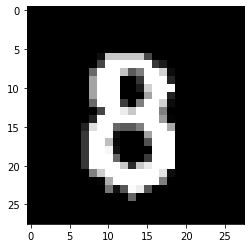

81img/d_0_4.jpeg under  progress 


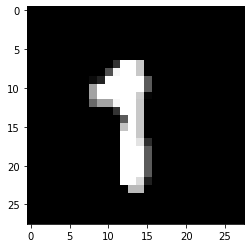

81img/d_0_8.jpeg under  progress 


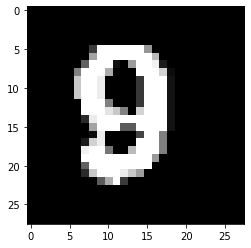

81img/d_1_1.jpeg under  progress 


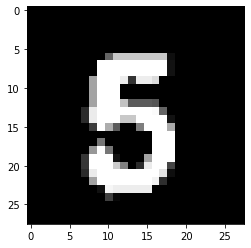

81img/d_1_3.jpeg under  progress 


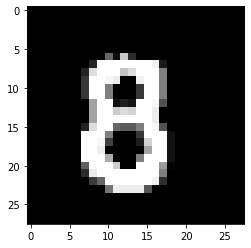

81img/d_1_5.jpeg under  progress 


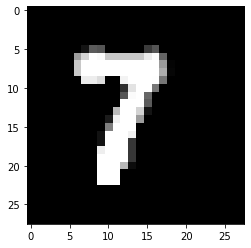

81img/d_1_7.jpeg under  progress 


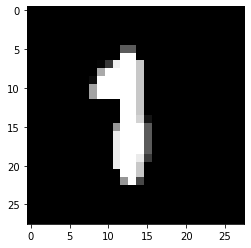

81img/d_2_2.jpeg under  progress 


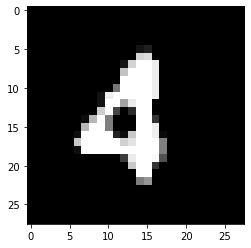

81img/d_2_4.jpeg under  progress 


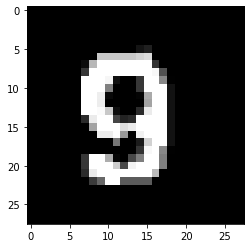

81img/d_2_6.jpeg under  progress 


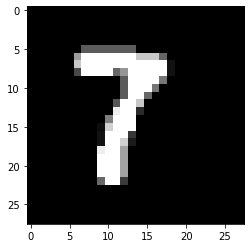

81img/d_3_1.jpeg under  progress 


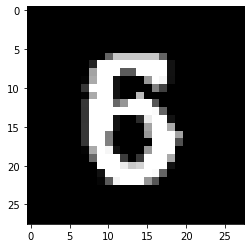

81img/d_3_3.jpeg under  progress 


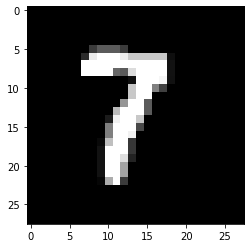

81img/d_3_5.jpeg under  progress 


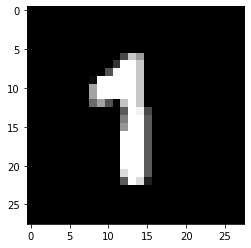

81img/d_3_7.jpeg under  progress 


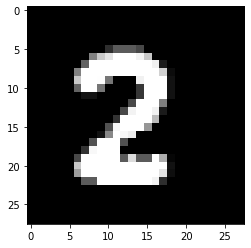

81img/d_4_0.jpeg under  progress 


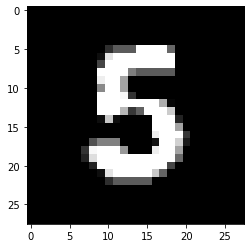

81img/d_4_2.jpeg under  progress 


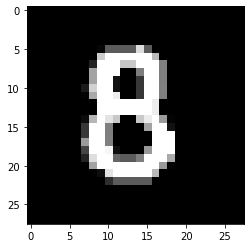

81img/d_4_4.jpeg under  progress 


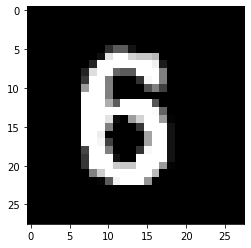

81img/d_4_6.jpeg under  progress 


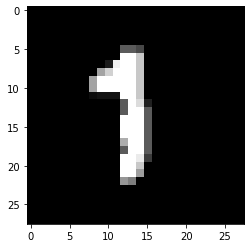

81img/d_4_8.jpeg under  progress 


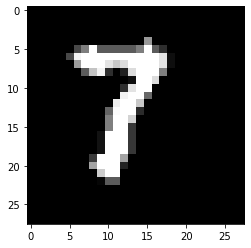

81img/d_5_1.jpeg under  progress 


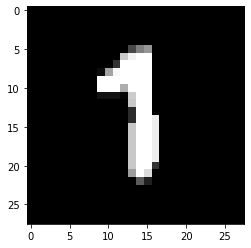

81img/d_5_3.jpeg under  progress 


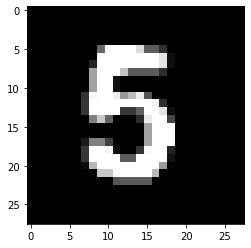

81img/d_5_5.jpeg under  progress 


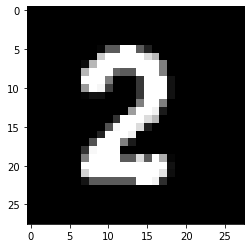

81img/d_5_7.jpeg under  progress 


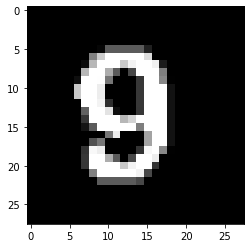

81img/d_6_2.jpeg under  progress 


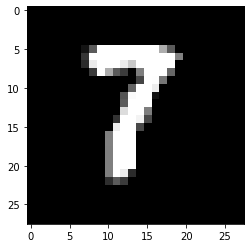

81img/d_6_4.jpeg under  progress 


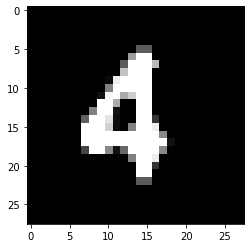

81img/d_6_6.jpeg under  progress 


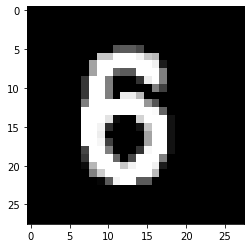

81img/d_7_1.jpeg under  progress 


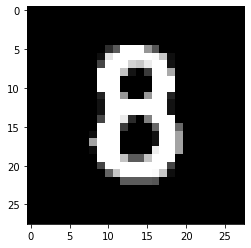

81img/d_7_3.jpeg under  progress 


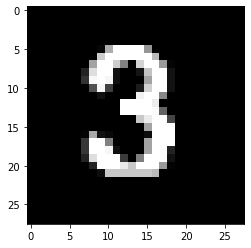

81img/d_7_5.jpeg under  progress 


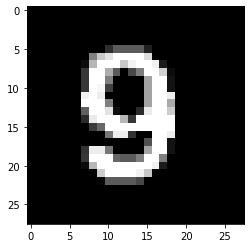

81img/d_7_7.jpeg under  progress 


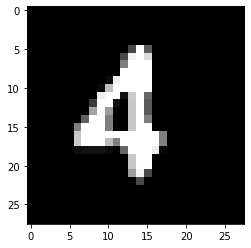

81img/d_8_0.jpeg under  progress 


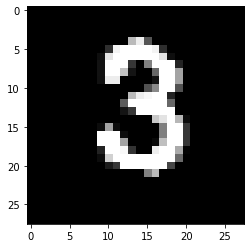

81img/d_8_4.jpeg under  progress 


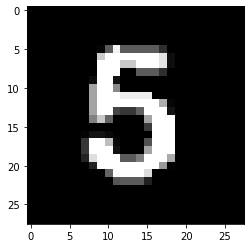

81img/d_8_8.jpeg under  progress 


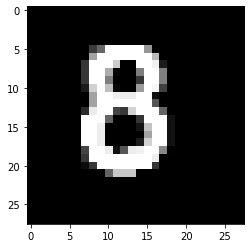

In [73]:
#################################################
################################################

# test cases : 

final = cv2.resize(resized,(28*9,28*9))

cv2.imshow('image', final) 
cv2.waitKey(0)   
cv2.destroyAllWindows()


for i in range (0,9):
    for j in range(0,9):
        lov = np.zeros((28,28))
        t = np.zeros((28,28))
        for l in range(0,28):
            for m in range(0,28):
                t[l][m] = final[28*i + l][28*j + m] 
                dim = (28*28,1)
                red = np.reshape(t,dim)
                
                lov = np.reshape(red,(28,28))
                lov  =lov.astype('uint8')

#pt = (0,0)
#cv2.floodFill(lov, None,pt , 0)
#cv2.floodFill(t, None, (0, 0), 0)

                height = 28
                width = 28  
        s = np.sum(lov)
        if(s > 7*255):
            
                            #
            
            title ="81img/"+ "d_"+str(i)+"_"+str(j)+".jpeg"
        
            print(title + " under  progress ")
        
            cv2.imwrite(title, lov) 
        

            plt.imshow(lov,cmap='gray', vmin=0, vmax=255)
        #plt.savefig(lov,title)
        #print(title)
            plt.show()
        



81img/d_0_0.jpeg under  progress 


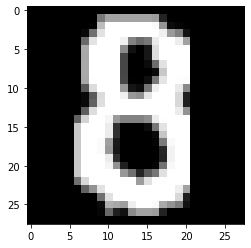

81img/d_0_4.jpeg under  progress 


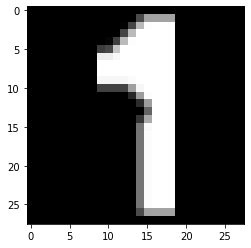

81img/d_0_8.jpeg under  progress 


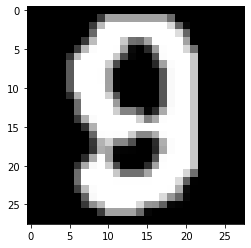

81img/d_1_1.jpeg under  progress 


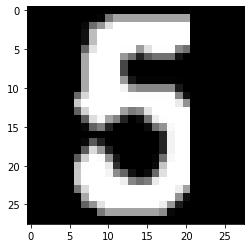

81img/d_1_3.jpeg under  progress 


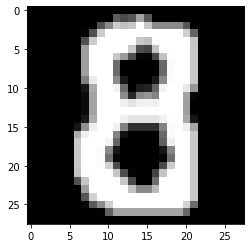

81img/d_1_5.jpeg under  progress 


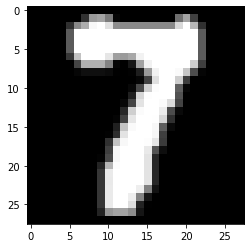

81img/d_1_7.jpeg under  progress 


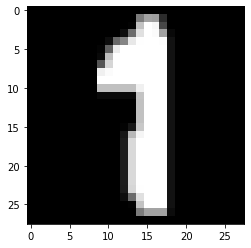

81img/d_2_2.jpeg under  progress 


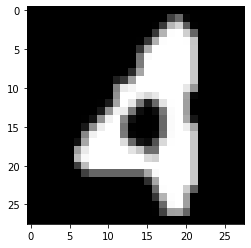

81img/d_2_4.jpeg under  progress 


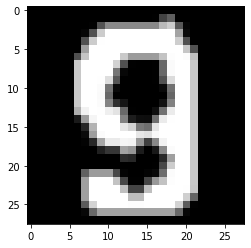

81img/d_2_6.jpeg under  progress 


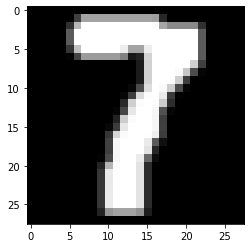

81img/d_3_1.jpeg under  progress 


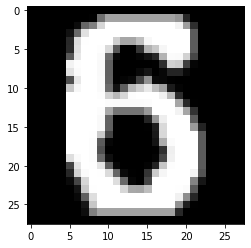

81img/d_3_3.jpeg under  progress 


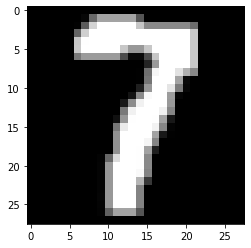

81img/d_3_5.jpeg under  progress 


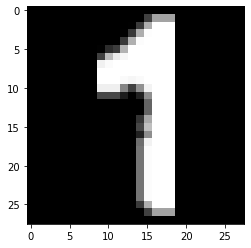

81img/d_3_7.jpeg under  progress 


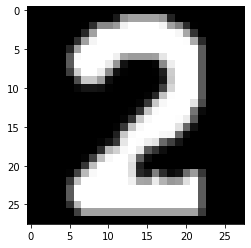

81img/d_4_0.jpeg under  progress 


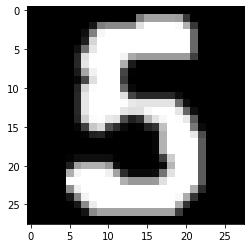

81img/d_4_2.jpeg under  progress 


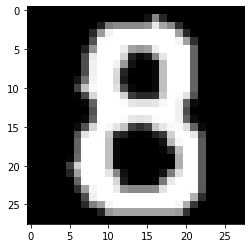

81img/d_4_4.jpeg under  progress 


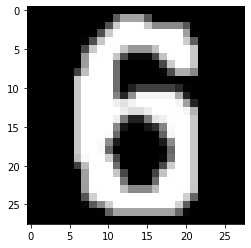

81img/d_4_6.jpeg under  progress 


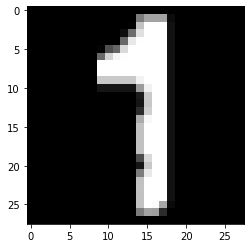

81img/d_4_8.jpeg under  progress 


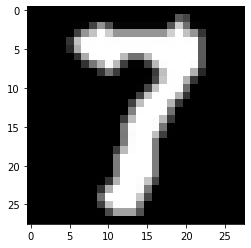

81img/d_5_1.jpeg under  progress 


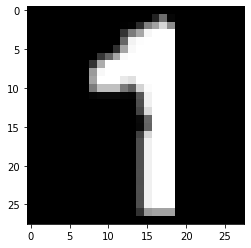

81img/d_5_3.jpeg under  progress 


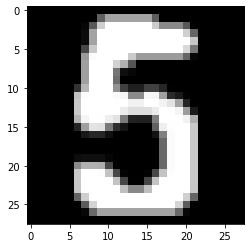

81img/d_5_5.jpeg under  progress 


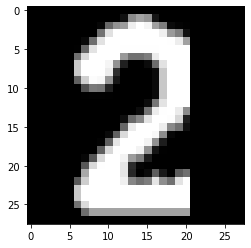

81img/d_5_7.jpeg under  progress 


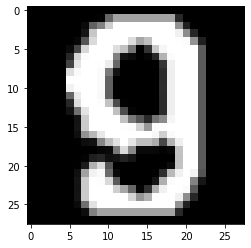

81img/d_6_2.jpeg under  progress 


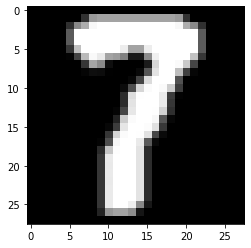

81img/d_6_4.jpeg under  progress 


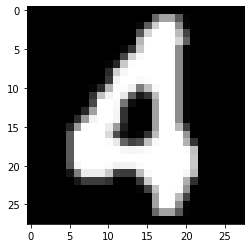

81img/d_6_6.jpeg under  progress 


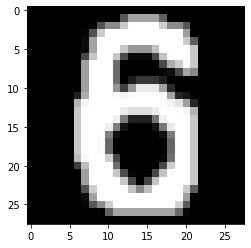

81img/d_7_1.jpeg under  progress 


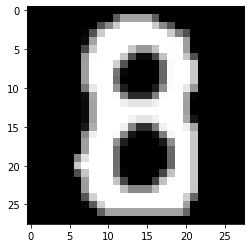

81img/d_7_3.jpeg under  progress 


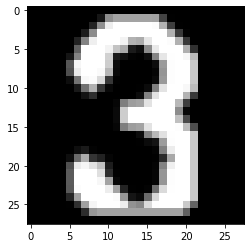

81img/d_7_5.jpeg under  progress 


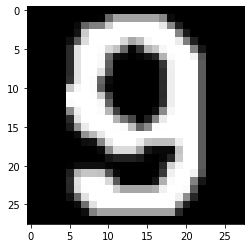

81img/d_7_7.jpeg under  progress 


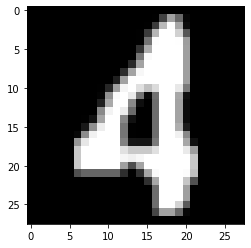

81img/d_8_0.jpeg under  progress 


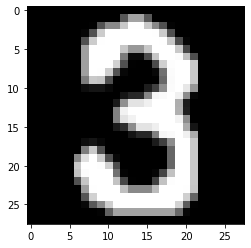

81img/d_8_4.jpeg under  progress 


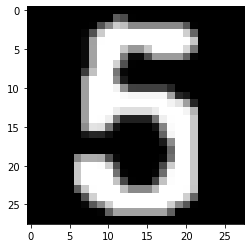

81img/d_8_8.jpeg under  progress 


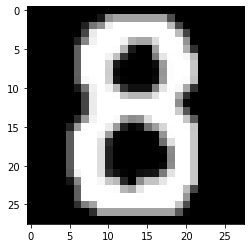

In [65]:
for i in range (0,9):
    for j in range(0,9):
        lov = np.zeros((28,28))
        t = np.zeros((28,28))
        for l in range(0,28):
            for m in range(0,28):
                t[l][m] = final[28*i + l][28*j + m] 
                dim = (28*28,1)
                red = np.reshape(t,dim)
                
                lov = np.reshape(red,(28,28))
                lov  =lov.astype('uint8')

#pt = (0,0)
#cv2.floodFill(lov, None,pt , 0)
#cv2.floodFill(t, None, (0, 0), 0)

                height = 28
                width = 28  
        s = np.sum(lov)
        if(s > 7*255):
            
                            #
            
            title ="81img/"+ "d_"+str(i)+"_"+str(j)+".jpeg"
        
            print(title + " under  progress ")
        
            cv2.imwrite(title, lov) 
        

            plt.imshow(lov,cmap='gray', vmin=0, vmax=255)
        #plt.savefig(lov,title)
        #print(title)
            plt.show()
        


uint8


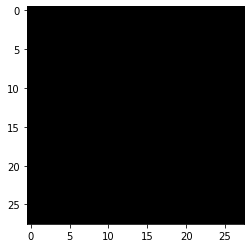

In [223]:
i = 0
j = 4
        
t = np.zeros((28,28))
for l in range(0,28):
    for m in range(0,28):
        t[l][m] = resized[28*i + l][28*j + m] 
        
dim = (28*28,1)
red = np.reshape(t,dim)
lov = np.reshape(red,(28,28))
lov  =lov.astype('uint8')

#pt = (0,0)
#cv2.floodFill(lov, None,pt , 0)
#cv2.floodFill(t, None, (0, 0), 0)

height = 28
width = 28

mask1 = np.zeros((height+2, width+2), np.uint8) 
print(lov.dtype)# line 26


for x in range(0,28):
    for y in range(0,28):
        if (x < 5 or y < 5 or x > 23 or y > 23):

            cv2.floodFill(lov,mask1,(x,y),0)  
            
            
        
plt.imshow(lov,cmap='gray', vmin=0, vmax=255)
plt.show()


In [47]:
array = np.zeros((9,9,28*28))
temp = np.zeros((28,28))
red = np.zeros(28*28) 
dim = (28*28)
for i in range(0,9):
    for j in range (0,9):
        #print("i=  %d and j =  %d " %(i,j))
        for l in range(0,28):
            for m in range(0,28):
                temp[l][m] = resized[28*i + l][28*j + m] 
        red = np.reshape(temp,dim)
        array[i][j] = red
        
        


In [48]:




for i in range(0,9):
    for j in range(0,9):
        temp9 = np.zeros((28,28))
        temp2 = np.zeros(28*28)
        
        temp2 = array[i][j]
        temp9 = np.reshape(temp2,(28,28))
        
        temp9  =temp9.astype('uint8')

        
        height = 28
        width = 28
        mask1 = np.zeros((height+2, width+2), np.uint8) 
        for a in range(0,28):
            for b in range(0,28):
                if (a < 5 or b < 5 or a> 23 or b > 23):
            #print("d")
                    cv2.floodFill(temp9,mask1,(a,b),0)
        
        temp2  = np.reshape(temp9,(28*28))
        array[i][j] = temp2
        #plt.imshow(temp9,cmap='gray', vmin=0, vmax=255)
        #plt.show()



THIS IS  :  (0, 0)
(28, 28)


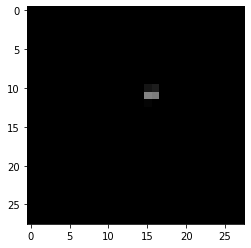

THIS IS  :  (0, 1)
(28, 28)


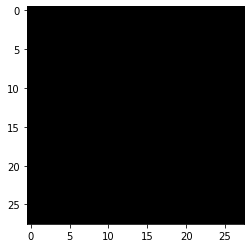

THIS IS  :  (0, 2)
(28, 28)


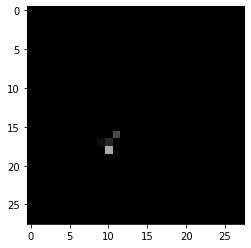

THIS IS  :  (0, 3)
(28, 28)


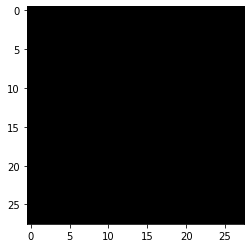

THIS IS  :  (0, 4)
(28, 28)


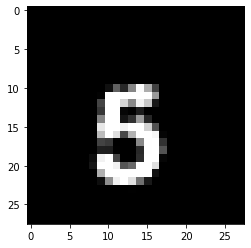

THIS IS  :  (0, 5)
(28, 28)


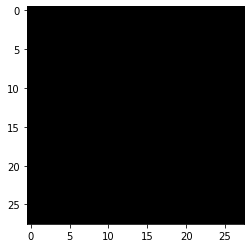

THIS IS  :  (0, 6)
(28, 28)


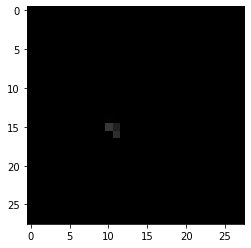

THIS IS  :  (0, 7)
(28, 28)


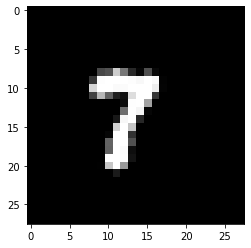

THIS IS  :  (0, 8)
(28, 28)


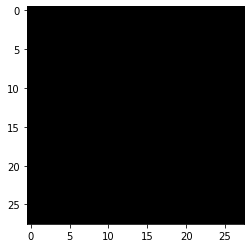

THIS IS  :  (1, 0)
(28, 28)


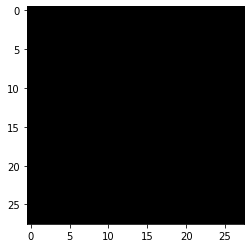

THIS IS  :  (1, 1)
(28, 28)


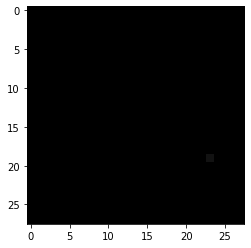

THIS IS  :  (1, 2)
(28, 28)


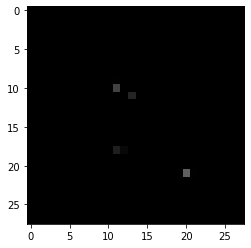

THIS IS  :  (1, 3)
(28, 28)


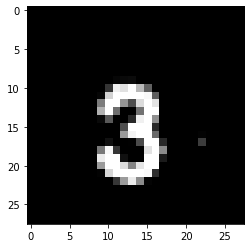

THIS IS  :  (1, 4)
(28, 28)


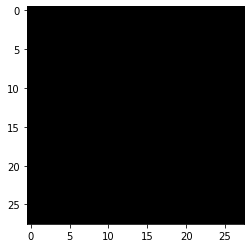

THIS IS  :  (1, 5)
(28, 28)


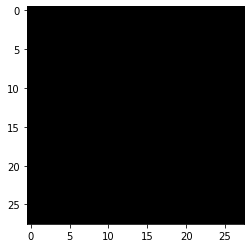

THIS IS  :  (1, 6)
(28, 28)


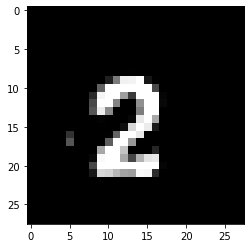

THIS IS  :  (1, 7)
(28, 28)


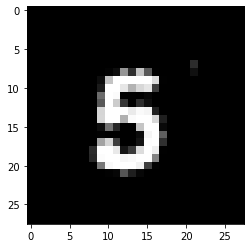

THIS IS  :  (1, 8)
(28, 28)


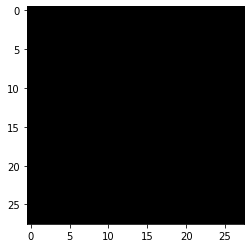

THIS IS  :  (2, 0)
(28, 28)


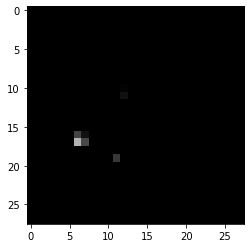

THIS IS  :  (2, 1)
(28, 28)


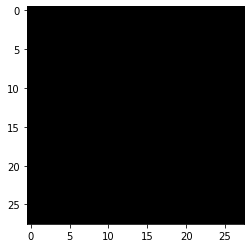

THIS IS  :  (2, 2)
(28, 28)


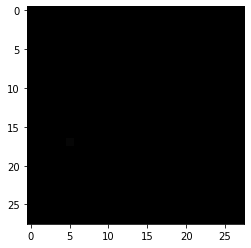

THIS IS  :  (2, 3)
(28, 28)


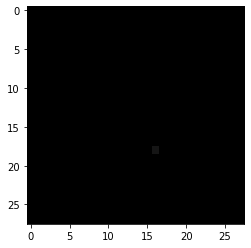

THIS IS  :  (2, 4)
(28, 28)


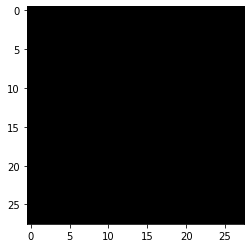

THIS IS  :  (2, 5)
(28, 28)


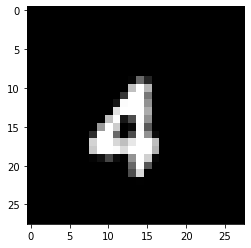

THIS IS  :  (2, 6)
(28, 28)


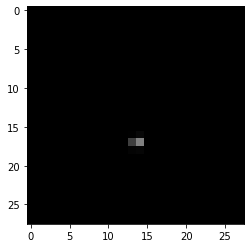

THIS IS  :  (2, 7)
(28, 28)


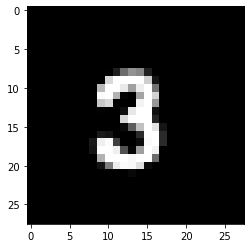

THIS IS  :  (2, 8)
(28, 28)


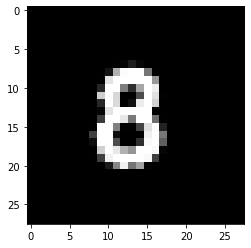

THIS IS  :  (3, 0)
(28, 28)


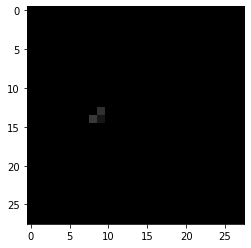

THIS IS  :  (3, 1)
(28, 28)


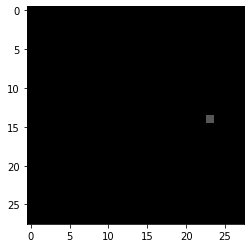

THIS IS  :  (3, 2)
(28, 28)


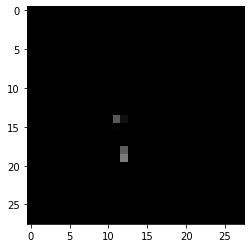

THIS IS  :  (3, 3)
(28, 28)


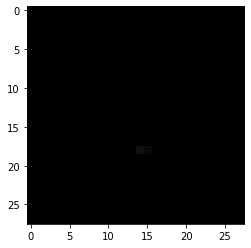

THIS IS  :  (3, 4)
(28, 28)


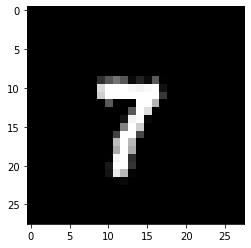

THIS IS  :  (3, 5)
(28, 28)


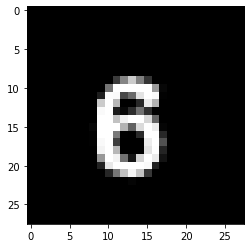

THIS IS  :  (3, 6)
(28, 28)


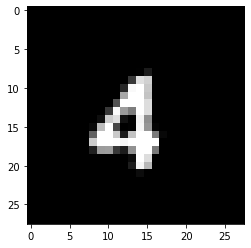

THIS IS  :  (3, 7)
(28, 28)


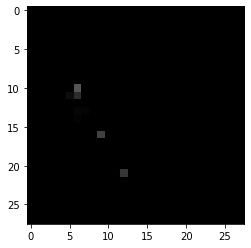

THIS IS  :  (3, 8)
(28, 28)


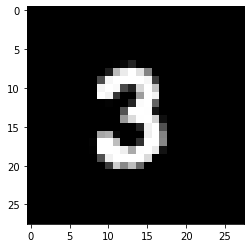

THIS IS  :  (4, 0)
(28, 28)


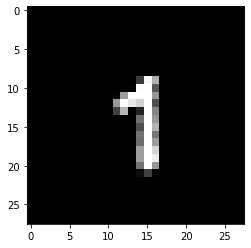

THIS IS  :  (4, 1)
(28, 28)


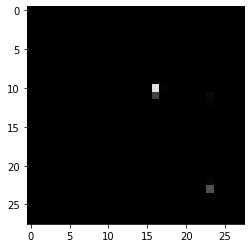

THIS IS  :  (4, 2)
(28, 28)


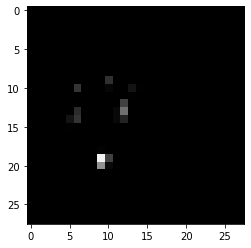

THIS IS  :  (4, 3)
(28, 28)


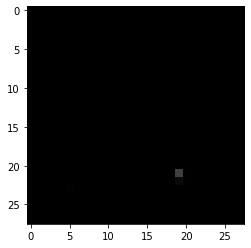

THIS IS  :  (4, 4)
(28, 28)


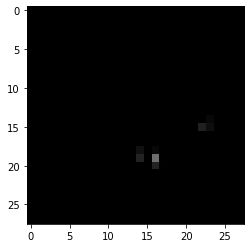

THIS IS  :  (4, 5)
(28, 28)


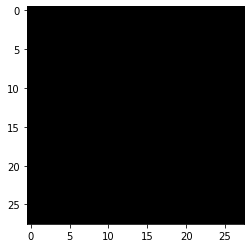

THIS IS  :  (4, 6)
(28, 28)


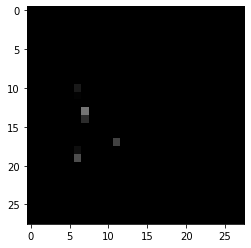

THIS IS  :  (4, 7)
(28, 28)


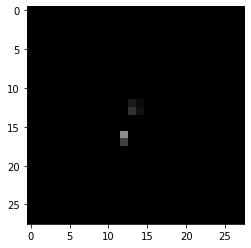

THIS IS  :  (4, 8)
(28, 28)


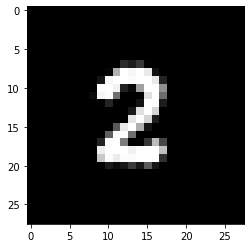

THIS IS  :  (5, 0)
(28, 28)


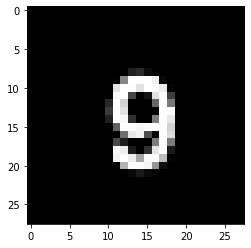

THIS IS  :  (5, 1)
(28, 28)


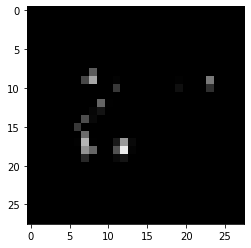

THIS IS  :  (5, 2)
(28, 28)


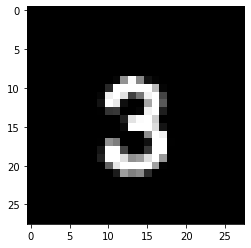

THIS IS  :  (5, 3)
(28, 28)


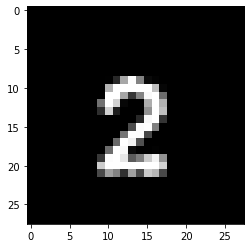

THIS IS  :  (5, 4)
(28, 28)


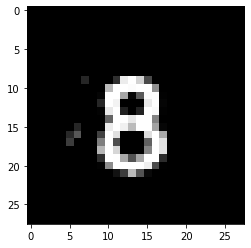

THIS IS  :  (5, 5)
(28, 28)


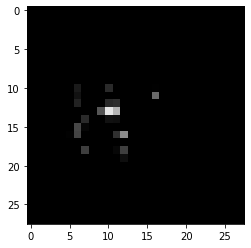

THIS IS  :  (5, 6)
(28, 28)


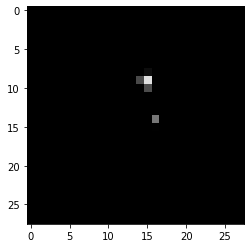

THIS IS  :  (5, 7)
(28, 28)


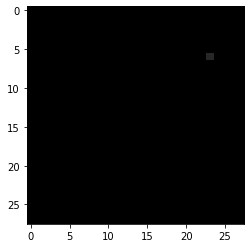

THIS IS  :  (5, 8)
(28, 28)


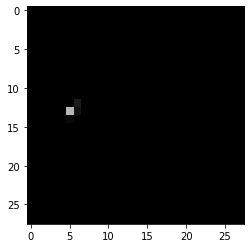

THIS IS  :  (6, 0)
(28, 28)


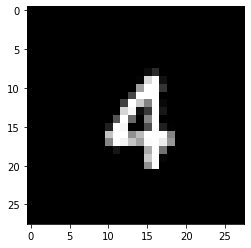

THIS IS  :  (6, 1)
(28, 28)


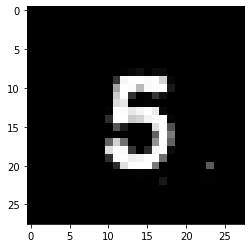

THIS IS  :  (6, 2)
(28, 28)


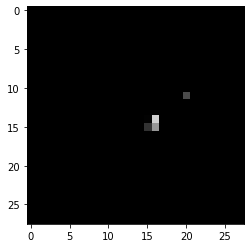

THIS IS  :  (6, 3)
(28, 28)


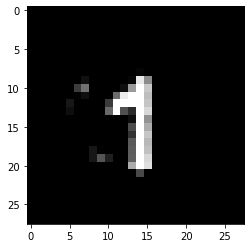

THIS IS  :  (6, 4)
(28, 28)


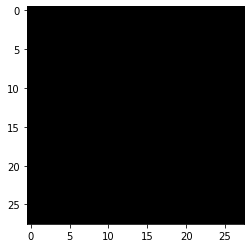

THIS IS  :  (6, 5)
(28, 28)


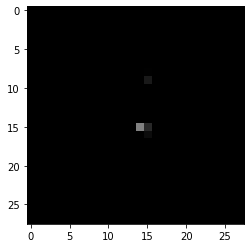

THIS IS  :  (6, 6)
(28, 28)


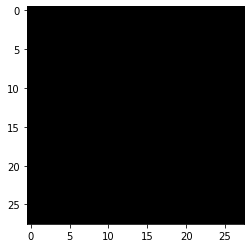

THIS IS  :  (6, 7)
(28, 28)


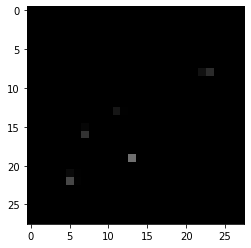

THIS IS  :  (6, 8)
(28, 28)


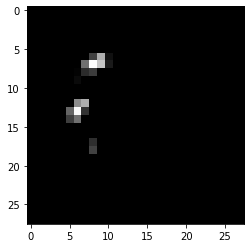

THIS IS  :  (7, 0)
(28, 28)


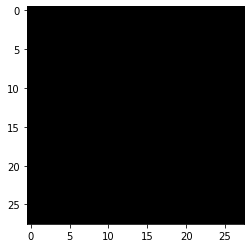

THIS IS  :  (7, 1)
(28, 28)


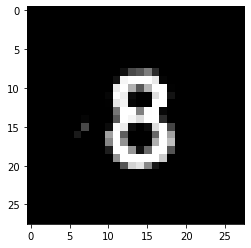

THIS IS  :  (7, 2)
(28, 28)


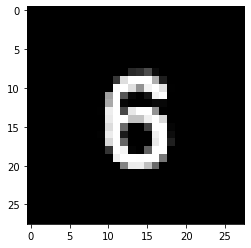

THIS IS  :  (7, 3)
(28, 28)


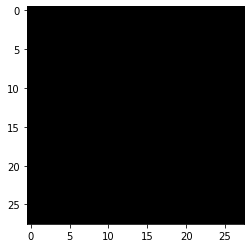

THIS IS  :  (7, 4)
(28, 28)


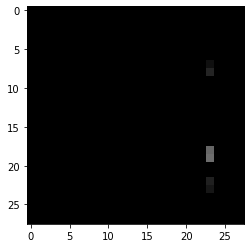

THIS IS  :  (7, 5)
(28, 28)


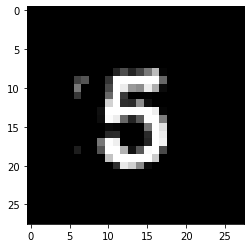

THIS IS  :  (7, 6)
(28, 28)


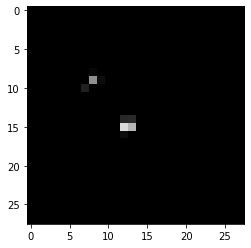

THIS IS  :  (7, 7)
(28, 28)


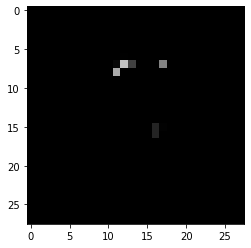

THIS IS  :  (7, 8)
(28, 28)


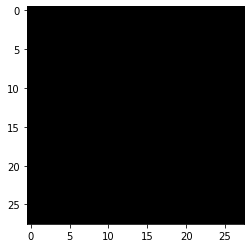

THIS IS  :  (8, 0)
(28, 28)


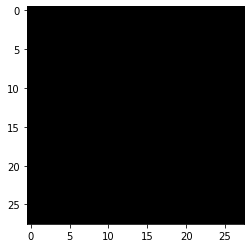

THIS IS  :  (8, 1)
(28, 28)


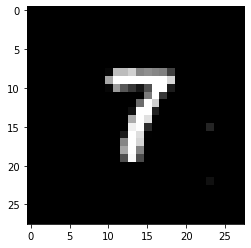

THIS IS  :  (8, 2)
(28, 28)


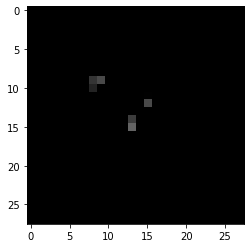

THIS IS  :  (8, 3)
(28, 28)


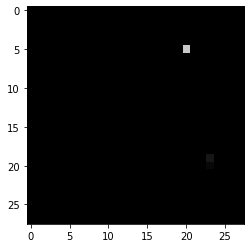

THIS IS  :  (8, 4)
(28, 28)


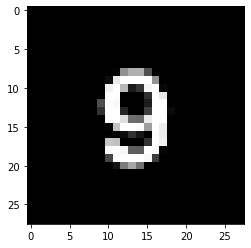

THIS IS  :  (8, 5)
(28, 28)


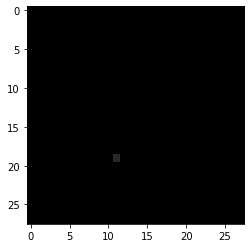

THIS IS  :  (8, 6)
(28, 28)


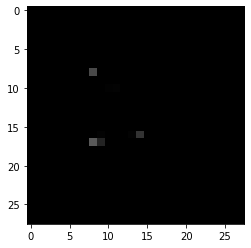

THIS IS  :  (8, 7)
(28, 28)


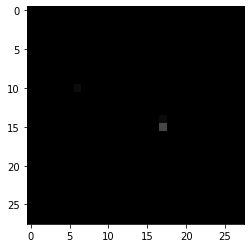

THIS IS  :  (8, 8)
(28, 28)


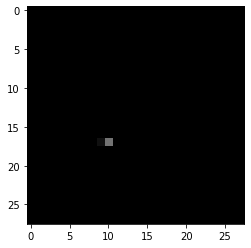

In [49]:
height = 28
width = 28

mask1 = np.zeros((height+2, width+2), np.uint8) 

for i in range(0,9):
    for j in range(0,9):
        temp9 = np.zeros((28,28))
        temp2 = np.zeros(28*28)
        temp2 = array[i][j]
        temp9 = np.reshape(temp2,(28,28))
        
        temp9  =temp9.astype('uint8')
        
        print("THIS IS  : ",(i,j))
        print(np.shape(temp9))
        plt.imshow(temp9,cmap='gray', vmin=0, vmax=255)
        plt.show()


In [28]:
import sys
print(sys.version)

import tensorflow as tf

3.7.4 (default, Aug 13 2019, 20:35:49) 
[GCC 7.3.0]


In [27]:
a = cv2.imread('81img/d_2_7.jpeg',0)
kernel = np.ones((2,2), np.uint8)
b = cv2.erode(a, kernel, iterations = 2)


cv2.imshow('image', a) 
cv2.waitKey(0)   
cv2.destroyAllWindows()

cv2.imshow('image', b) 
cv2.waitKey(0)   
cv2.destroyAllWindows()